Copyright (c) 2021 Python Charmers. All rights reserved. Please do not distribute.

# Day 5 - Python for Scientists and Engineers - 2021-11-26

Welcome back!



**Plan for today:**
- Tour of Scipy
    - Optimisation and Curve fitting
    - Interpolation (with NumPy and images)
    - Data Smoothing and denoising
    - Ordinary Differential Equations
    - Hypothesis testing
- Writing faster numerical code with Numba and Cython
- Parallel processing with Dask
- Any interests of yours


**Do you have any topics to add/remove?**
No - happy with outline as is.

**Questions from this week so far?**

Documentation and links to "good libraries":
- https://github.com/PythonCharmers/PythonCharmersDocs
- https://github.com/vinta/awesome-python

# Optimisation

In [1]:
from scipy import optimize

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
import pandas as pd

In [3]:
auto = pd.read_csv("/Data/Auto.csv")

In [5]:
auto.columns

Index(['Unnamed: 0', 'mpg', 'cylinders', 'displacement', 'horsepower',
       'weight', 'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [14]:
cols = ['cylinders', 'displacement', 'horsepower']
data = auto[cols].values   # Extracts just the underlying data from the pandas dataframe

In [15]:
data

array([[  8., 307., 130.],
       [  8., 350., 165.],
       [  8., 318., 150.],
       ...,
       [  4., 135.,  84.],
       [  4., 120.,  79.],
       [  4., 119.,  82.]])

In [16]:
data.dtype

dtype('float64')

In [21]:
import numpy as np

In [22]:
def f(x):
    return np.cos(x) * np.sin(x) * np.exp(x)

In [23]:
x = np.linspace(-5, 10, 100)  # Linearly spaced points from -5 to 10, makes 100 points
y = f(x)

In [24]:
from matplotlib import pyplot as plt

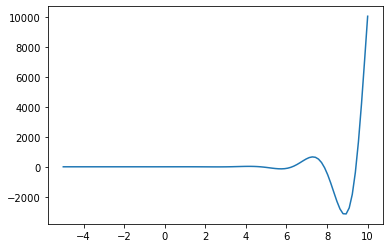

In [25]:
plt.plot(x, y)

In [27]:
optimize.fmin(f, x0=6)

Optimization terminated successfully.
         Current function value: -137.674471
         Iterations: 14
         Function evaluations: 28


array([5.72958984])

### Exercise

1. Try a different starting value and get the minimum value
2. Minimise $y=3x sin(x)$ across the range 0 to 10 


In [29]:
def f(x):
    return np.sin(x)*3*x

In [30]:
x = np.linspace(-5, 10, 100)  # Linearly spaced points from -5 to 10, makes 100 points
y = f(x)

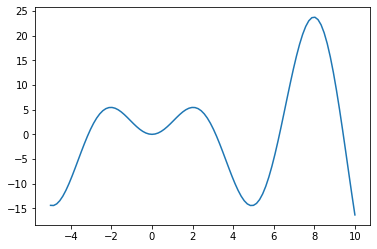

In [31]:
plt.plot(x, y)

In [34]:
optimize.fmin(f, x0=9)

Optimization terminated successfully.
         Current function value: -33.122124
         Iterations: 17
         Function evaluations: 34


array([11.08553467])

In [35]:
def linear(x):
    return -x

In [36]:
optimize.fmin(linear, x0=9)

array([5.7044277e+29])

In [52]:
def f2(x, a):
    return np.sin(a* x)*x

In [58]:
optimize.fmin(f2, x0=2, args=(5, ), )

Optimization terminated successfully.
         Current function value: -2.208142
         Iterations: 12
         Function evaluations: 24


array([2.21708984])

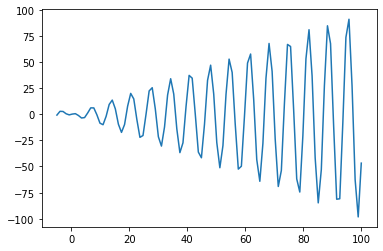

In [59]:
x = np.linspace(-5, 100, 100)  # Linearly spaced points from -5 to 10, makes 100 points
y =f2(x,5)
plt.plot(x, y)

In [60]:
def print_progress(results):
    print(results)

In [61]:
optimize.fmin(f2, x0=2, args=(5, ), callback=print_progress)

[2.2]
[2.2]
[2.225]
[2.2125]
[2.21875]
[2.215625]
[2.2171875]
[2.2171875]
[2.2171875]
[2.2171875]
[2.21708984]
Optimization terminated successfully.
         Current function value: -2.208142
         Iterations: 12
         Function evaluations: 24


array([2.21708984])

In [62]:
def f_2d(x):
    return np.sin(x[0]) * np.cos(x[1]) 

In [64]:
optimize.fmin(f_2d, x0=[2, 3])

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 33
         Function evaluations: 63


array([1.57078327, 3.14160237])

In [72]:

dwtemp = pd.read_csv("/Data/darwin-temp.csv", header=0, na_values="null")
dwtemp['Year.5'] = dwtemp['Year'] + (dwtemp["Month"] - 0.5) / 12
temperatures = dwtemp['Mean maximum temperature (°C)'].values
dates = dwtemp['Year.5'].values

(2000.0, 2017.0)

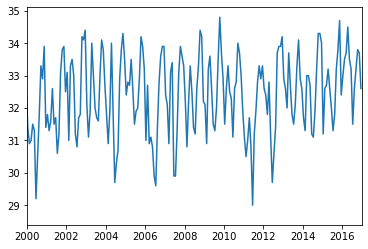

In [92]:
fig, ax = plt.subplots()
ax.plot(dates, temperatures)
ax.set_xlim(2000, 2017)

# ax.plot(dates, temperatures + 1)

$T(t) = t_0 + wt + A sin(\omega t + \phi)$

$T(t) = t_0$

In [84]:
def temperature(params, t):
    t0, w, A, omega, phi = params
    return t0 + w * t + A * np.sin(omega * t + phi)

In [85]:
def temperature_error(params, t, truetemp):
    return truetemp - temperature(params, t)

In [98]:
mean = temperatures.mean()

initial_params = np.array([mean, 0, 3, 2 * np.pi, np.pi/2])

In [99]:
best_params, success = optimize.leastsq(temperature_error, initial_params, args=(dates, temperatures))

In [100]:
best_params

array([ 6.49828542,  0.01290129,  0.76895389,  6.28870298, -8.83508527])

In [90]:
success

1

### Exercises

1. Passing these params to the `temperature` function, plot the estimated versus actual temperatures
2. What is the mean squared error of the estimate?
3. Repeat with only values from 2000 onwards

In [94]:
temperature_estimates = temperature(best_params, dates)
temperature_estimates

array([31.50992799, 31.48506319, 31.46419861, 31.4488469 , 31.44014069,
       31.43875443, 31.44485798, 31.45810484, 31.47765606, 31.50223808,
       31.53023052, 31.55977788, 31.58891748, 31.61571474, 31.63839656,
       31.65547356, 31.66584275, 31.66886355, 31.664402  , 31.65283995,
       31.63504876, 31.61232919, 31.58632181, 31.5588938 , 31.5320103 ,
       31.50759892, 31.48741681, 31.4729296 , 31.4652103 , 31.46486533,
       31.47199277, 31.48617553, 31.50651014, 31.53166903, 31.55999206,
       31.58960094, 31.61852873, 31.64485548, 31.6668405 , 31.68304247,
       31.6924187 , 31.69439709, 31.68891552, 31.67642617, 31.65786432,
       31.63458388, 31.60826405, 31.58079358, 31.55414053, 31.5302166 ,
       31.51074538, 31.49714345, 31.49042281, 31.49112104, 31.49926428,
       31.51436543, 31.53545771, 31.5611613 , 31.58977852, 31.61941079,
       31.64808958, 31.71885129, 31.71978605, 31.71329323, 31.69989471,
       31.68058844, 31.65677966, 31.63018399, 31.6027092 , 31.57

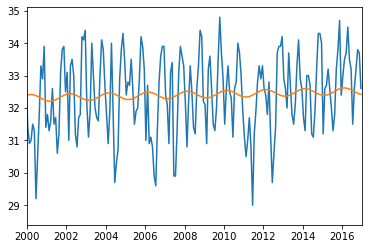

In [101]:
fig, ax = plt.subplots()
ax.plot(dates, temperatures)
ax.set_xlim(2000, 2017)

ax.plot(dates, temperature_estimates)

In [106]:
mse = ((temperature_estimates - temperatures)**2).mean()
mse

1.2974670321435338

In [107]:
np.sqrt(mse)

1.1390641036146885

In [108]:
mask = dates > 2000

dates_2000 = dates[mask]
temperatures_2000 = temperatures[mask]

In [109]:
dates.shape

(908,)

In [110]:
dates_2000.shape

(204,)

In [ ]:
mean = temperatures.mean()

initial_params = np.array([mean, 0, 3, 2 * np.pi, np.pi/2])

In [111]:
best_params, success = optimize.leastsq(temperature_error, initial_params, args=(dates_2000, temperatures_2000))

In [112]:
best_params

array([-5.19492596e+01,  4.20003921e-02,  8.41971868e-01,  6.27228105e+00,
        2.41242751e+01])

In [114]:
temperature_estimates_2000 = temperature(best_params, dates_2000)
temperature_estimates_2000;

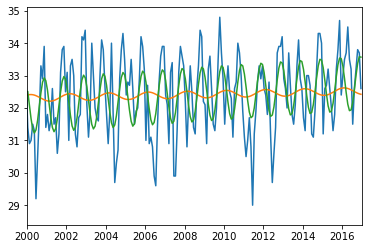

In [115]:
fig, ax = plt.subplots()
ax.plot(dates, temperatures)
ax.set_xlim(2000, 2017)

ax.plot(dates, temperature_estimates)
ax.plot(dates_2000, temperature_estimates_2000)

In [116]:
def temperature_error_mse(params, t, truetemp):
    error = temperature_error(params, t, truetemp)
    return np.mean(error **2)

In [120]:
results = optimize.minimize(temperature_error_mse, initial_params, args=(dates_2000, temperatures_2000))

In [121]:
results.x

array([-5.13856544e+01,  4.17194345e-02,  8.40655310e-01,  6.27963130e+00,
        9.36593109e+00])

In [122]:
results

      fun: 1.0470052842382893
 hess_inv: array([[ 7.64600528e+04, -3.80693445e+01,  2.40651472e+01,
         3.56378736e+00, -7.14383784e+03],
       [-3.80693445e+01,  1.89547889e-02, -1.19808525e-02,
        -1.77440314e-03,  3.55690591e+00],
       [ 2.40651471e+01, -1.19808525e-02,  9.62380755e-01,
         1.11908234e-03, -2.24460103e+00],
       [ 3.56378736e+00, -1.77440314e-03,  1.11908234e-03,
         1.66699304e-04, -3.33475357e-01],
       [-7.14383784e+03,  3.55690591e+00, -2.24460103e+00,
        -3.33475357e-01,  6.68473883e+02]])
      jac: array([ 1.91599131e-04,  4.32367310e-01, -7.69242644e-04, -1.49613708e-01,
       -1.38014555e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 593
      nit: 24
     njev: 83
   status: 2
  success: False
        x: array([-5.13856544e+01,  4.17194345e-02,  8.40655310e-01,  6.27963130e+00,
        9.36593109e+00])

In [129]:
def year_zero_33(params):
    # an "eq" constraint - the resulting value must always be zero
    return temperature(params, [0]) - 33


def amplitude_gte_2(params):
    # an "ineq" constraint - must always be non-negative
    A = params[2]
    return A - 2

def derivative(params):
    return w + -A * np.cos(omega * t + phi)

In [126]:
constraints = [
    {
        'fun': amplitude_gte_2,
        'type': 'ineq'
    },
#     {
#         'fun': derivative,
#         'type': 'ineq'
#     }
]

In [127]:
results = optimize.minimize(temperature_error_mse, initial_params, args=(dates_2000, temperatures_2000),
                            constraints=constraints)

In [128]:
results.x

array([3.20284149e+01, 1.88782639e-04, 2.00000000e+00, 6.28351924e+00,
       1.57225098e+00])

# Break until 10.55am

# Interpolation

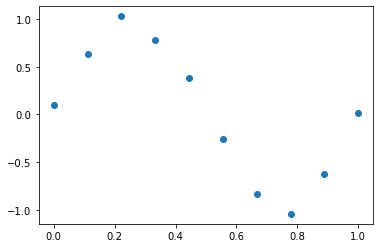

In [130]:
n_points = 10

t = np.linspace(0, 1, n_points)
noise = (np.random.random(n_points)*2 - 1) * 0.1
measured = np.sin(2 * np.pi * t) + noise
plt.plot(t, measured, 'o')

In [134]:
t

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [131]:
from scipy import interpolate

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [132]:
model_linear = interpolate.interp1d(t, measured, kind='linear')

In [133]:
type(model_linear)

scipy.interpolate.interpolate.interp1d

In [135]:
t2 = np.linspace(0.66666667, 0.88888889, 20)

In [136]:
y_linear = model_linear(t2)

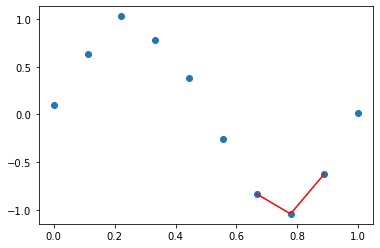

In [141]:
plt.plot(t, measured, 'o')  # original
plt.plot(t2, y_linear, 'r-')

### Exercise

1. Create a cubic interpolation model and fit to the same data range.
2. Plot all three (original, linear, cubic) to compare
3. Fit your cubic model to the entire range, with 100 data points

In [145]:
year2016 = dwtemp[dwtemp['Year'] == 2016]

In [150]:
months = year2016["Month"].values + 0.5
temps = year2016["Mean maximum temperature (°C)"].values

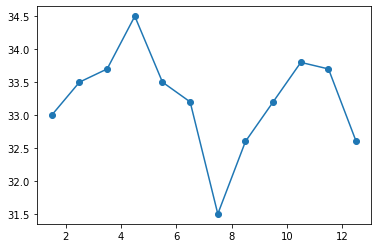

In [151]:
plt.plot(months, temps, 'o-')

## Exercise

Using either of linear or cubic interpolation, what is the estimated temperature for July 5th?

In [152]:
months

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
       12.5])

In [153]:
t2 = np.array([7 + 5/31])

In [154]:
model_cubic_temp = interpolate.interp1d(months, temps, kind='cubic')

In [158]:
t4 = np.linspace(1.5, 12.5, 100)

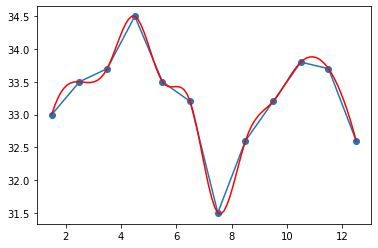

In [159]:
y_cubic_temp = model_cubic_temp(t4)
plt.plot(months, temps, 'o-')
plt.plot(t4, y_cubic_temp, 'r-')

In [160]:
tjuly = 7 + (5/31)

In [161]:
y_cubic_temp_5_july = model_cubic_temp(tjuly)
y_cubic_temp_5_july

array(31.92772193)

# Data smoothing and denoising

In [163]:
from scipy import signal

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [171]:
X, Y = np.mgrid[-70:70, -70:70]
Z = np.cos((X**2 + Y**2)/200) + np.random.normal(size=X.shape)

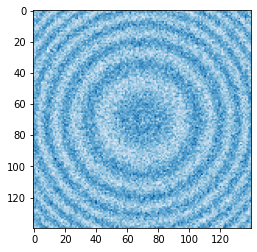

In [172]:
plt.imshow(Z, cmap='Blues')

In [173]:
def blur_image(image, kernel, n, mode='valid'):
    window_function = kernel(n)
    image_processed = signal.convolve(image, window_function, mode=mode)
    return image_processed

In [187]:
def mean_kern(size):
    kernel = np.ones((2 * size + 1, 2 * size + 1))
    return kernel / kernel.sum()

In [188]:
mean_kern(2)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [189]:
Z2 = blur_image(Z, mean_kern, 2)

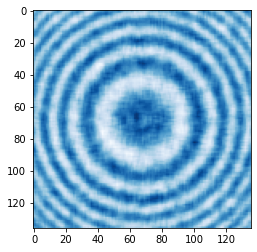

In [190]:
plt.imshow(Z2, cmap='Blues')

### Exercise

1. Try a mean kernel with size 10 - is this coarser or smoother?
2. Try a Gaussian filter, using this formula:

$g = e^{-(x^2 + y^2)}$

For $e^2$, use:

In [191]:
np.exp(2)

7.38905609893065

In [194]:
size = 2
x, y = np.mgrid[-size:size+1, -size:size+1]  # This generates the x and y values for your Gaussian filter

The following kernel implements the equation:
$ g = x + y$

In [203]:
def simple_sum_kernel(size):
    x, y = np.mgrid[-size:size+1, -size:size+1]
    z = x + y
    return z # / z.sum()

In [202]:
simple_sum_kernel(2)

array([[-4., -3., -2., -1.,  0.],
       [-3., -2., -1.,  0.,  1.],
       [-2., -1.,  0.,  1.,  2.],
       [-1.,  0.,  1.,  2.,  3.],
       [ 0.,  1.,  2.,  3.,  4.]])

In [204]:
Z3 = blur_image(Z, simple_sum_kernel, 2)

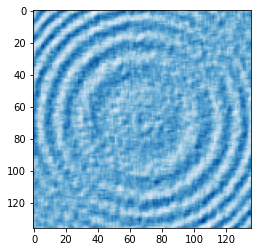

In [206]:
plt.imshow(Z3, cmap="Blues")

In [217]:
def gaussian_kernel(size):
    x, y = np.mgrid[-size:size+1, -size:size+1]
    z = np.exp(-(x**2 + y**2) / size)
    return z / z.sum()

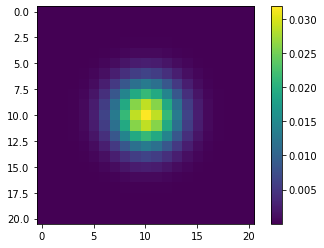

In [218]:
plt.imshow(gaussian_kernel(10))
plt.colorbar()

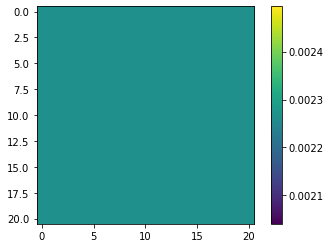

In [222]:
plt.imshow(mean_kern(10))
plt.colorbar()

In [219]:
Z4 = blur_image(Z, gaussian_kernel, 3)

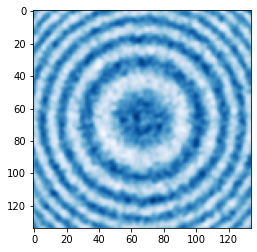

In [220]:
plt.imshow(Z4, cmap="Blues")

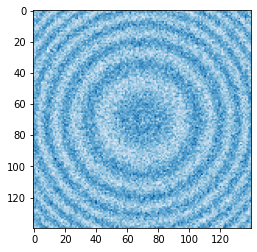

In [221]:
plt.imshow(Z, cmap="Blues")

# Filtering periodic noise in images

In [223]:
moon = plt.imread("/Data/moonlanding.png")

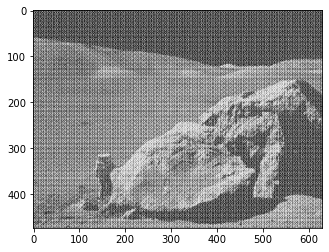

In [225]:
plt.imshow(moon, cmap='Greys_r')

In [226]:
F = np.fft.fft2(moon)

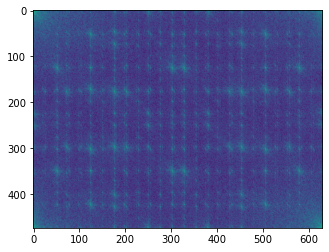

In [228]:
plt.imshow(np.log(5 + np.abs(F)))

In [240]:
ff = F.copy()

ff[50:-50] = 0
ff[:, 50:-50] = 0


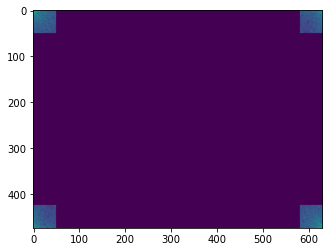

In [241]:
plt.imshow(np.log(5 + np.abs(ff)))

In [242]:
moon_fixed = np.fft.ifft2(ff).real

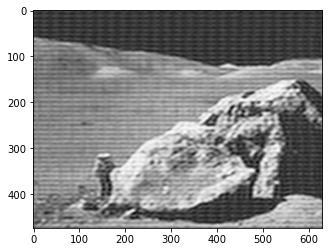

In [243]:
plt.imshow(moon_fixed,  cmap='Greys_r')

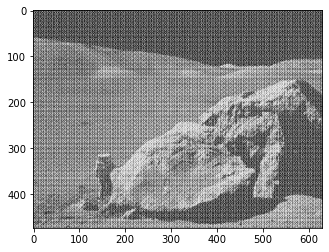

In [244]:
plt.imshow(moon,  cmap='Greys_r')

https://youtu.be/spUNpyF58BY

# Ordinary Differential Equations (ODEs)

$\frac{dy}{dt} = -2y$

In [245]:
from scipy.integrate import odeint

In [247]:
def dydt(y, t):
    return -2 * y

In [248]:
y_0 = 1

In [249]:
t = np.linspace(0, 4, 50)
y = odeint(dydt, y_0, t)

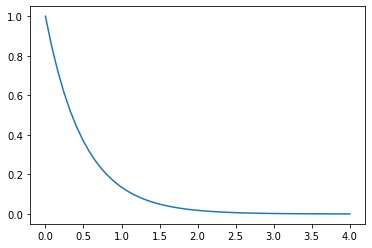

In [250]:
plt.plot(t, y)

# Dampled Harmonic Oscillator


$\frac{dp}{dt} = -2\zeta \omega_0 p - \omega_0^2 x$, where $\frac{dx}{dt} = p$

In [259]:
from scipy.integrate import odeint

In [251]:
def dy(y, t, zeta, w0):
    'The RHS of the damped oscillator ODE'
    x, p = y[0], y[1]
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x
    return dx, dp

In [252]:
y0 = [1, 0]

In [257]:
t = np.linspace(0, 10, 1000)
w0 = 2 * np.pi

y1 = odeint(dy, y0, t, args=(0.1, w0))

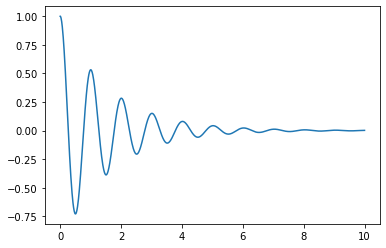

In [258]:
plt.plot(t, y1[:,0]);

### Exercise

Give this a go, plotting 3 different damping factors overlayed

**Exercise**

Newton's cooling equation is defined as:

$\frac{d\theta}{dt} = -k(\theta - \theta_e)$

Where:
- $\theta$ is the temperature of the object
- $\theta_e$ is the temperature of the environment (assumed constant)
- $t$ is time
- $k$ is some coefficient of how fast the heat transfer occurs


1. Integrate this function using `odeint`, given an initial starting object temperature of 100°C, an environment temperature of 10°C and a heat transfer coefficient of 0.1.
2. Plot the temperature of the object as a function of time from 0 to 100 seconds.
3. What is the value converging at? (hint: you can approximate this - although its fairly obvious when you see the result - by just integrating over a very large number of seconds, say 1,000,000).

**Extended Exercise**

1. Ensure that $\theta_e$ and $k$ are arguments into your function (not hard-coded).
2. Plot various $k$ values and how they affect the heat transfer
3. How long does it take to cool an object from 100°C to 10°C, with an allowed 0.1°C tolerance (in other words, cool to under 10.1°C), if the $k$ value is 0.2?


In [260]:


def dTdt(z, t):
    k = 0.1
    T2 = 10
    return -k*(z-T2)


def cooling(theta, t, k=0.1, thetae=10):
    return -k * (theta-thetae)


In [263]:
t = np.linspace(0, 100, 1000)

In [264]:
z1 = odeint(dTdt, 100, t)

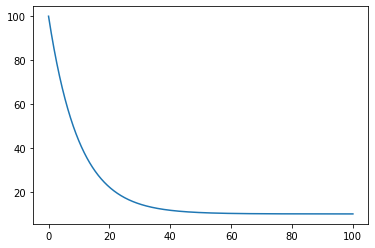

In [265]:
plt.plot(t, z1);

In [267]:
z2 = odeint(cooling, 100, t, args=(0.2, 15))

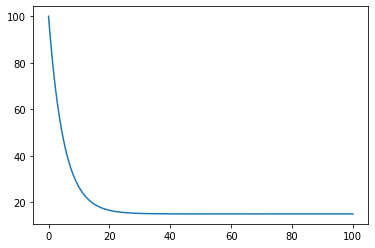

In [268]:
plt.plot(t, z2);

# Back at 1.45pm

# Statistical Testing with Scipy

In [269]:
from scipy import stats

In [270]:
abalone = pd.read_csv("/Data/abalone.csv")

In [271]:
abalone.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [272]:
male_mask = abalone['sex'] == "M"
female_mask = abalone['sex'] == "F"
males = abalone[male_mask]
females = abalone[female_mask]

In [275]:
f_weights = females['whole weight'].values
m_weights = males['whole weight'].values

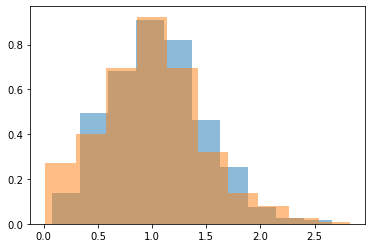

In [285]:
plt.hist(f_weights, alpha=0.5, density=True)
plt.hist(m_weights, alpha=0.5, density=True);

In [286]:
f_weights.mean()

1.0465321346595258

In [287]:
m_weights.mean()

0.9914594240837696

In [288]:
tstat, p_value = stats.ttest_ind(f_weights, m_weights)

In [290]:
p_value

0.0012497207919589404

In [291]:
stats.ttest_1samp(f_weights, 1.0)

Ttest_1sampResult(statistic=3.909335649925396, pvalue=9.730106133355086e-05)

### Exercise

1. Do a nonparametric statistic test comparing males to females, testing that males < females in weight, using Mann-Whitney U test (see below).
2. Do the same with a Kolmogorov-Smirnov test (see below)

In [292]:
stats.mannwhitneyu?

Signature: stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)
Docstring:
Compute the Mann-Whitney rank test on samples x and y.

Parameters
----------
x, y : array_like
    Array of samples, should be one-dimensional.
use_continuity : bool, optional
        Whether a continuity correction (1/2.) should be taken into
        account. Default is True.
alternative : {None, 'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis.
    The following options are available (default is None):

      * None: computes p-value half the size of the 'two-sided' p-value and
        a different U statistic. The default behavior is not the same as
        using 'less' or 'greater'; it only exists for backward compatibility
        and is deprecated.
      * 'two-sided'
      * 'less': one-sided
      * 'greater': one-sided

    Use of the None option is deprecated.

Returns
-------
statistic : float
    The Mann-Whitney U statistic, equal to min(U for x, U for y) i

In [293]:
stats.ks_2samp?

Signature: stats.ks_2samp(data1, data2, alternative='two-sided', mode='auto')
Docstring:
Compute the Kolmogorov-Smirnov statistic on 2 samples.

This is a two-sided test for the null hypothesis that 2 independent samples
are drawn from the same continuous distribution.  The alternative hypothesis
can be either 'two-sided' (default), 'less' or 'greater'.

Parameters
----------
data1, data2 : sequence of 1-D ndarrays
    Two arrays of sample observations assumed to be drawn from a continuous
    distribution, sample sizes can be different.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis.
    The following options are available (default is 'two-sided'):

      * 'two-sided'
      * 'less': one-sided, see explanation in Notes
      * 'greater': one-sided, see explanation in Notes
mode : {'auto', 'exact', 'asymp'}, optional
    Defines the method used for calculating the p-value.
    The following options are available (default is 'auto'):

  

In [294]:
norm = stats.norm(3, 0.2)

In [ ]:
norm.rvs(1000)

In [297]:
stats.pearsonr?

Signature: stats.pearsonr(x, y)
Docstring:
Pearson correlation coefficient and p-value for testing non-correlation.

The Pearson correlation coefficient [1]_ measures the linear relationship
between two datasets.  The calculation of the p-value relies on the
assumption that each dataset is normally distributed.  (See Kowalski [3]_
for a discussion of the effects of non-normality of the input on the
distribution of the correlation coefficient.)  Like other correlation
coefficients, this one varies between -1 and +1 with 0 implying no
correlation. Correlations of -1 or +1 imply an exact linear relationship.
Positive correlations imply that as x increases, so does y. Negative
correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system
producing datasets that have a Pearson correlation at least as extreme
as the one computed from these datasets.

Parameters
----------
x : (N,) array_like
    Input array.
y : (N,) array_like


For more on SciPy:
https://www.oreilly.com/library/view/elegant-scipy/9781491922927/

# Writing Faster Numerical Code

In [298]:
# Don't type this

def distances_slow(point, points):
    distances = []
    x0, y0 = point
    
    for other_point in points:
        x, y = other_point
        distance = ((x0 - x)**2 + (y0-y)**2) ** 0.5
        distances.append(distance)
    return distances

In [299]:
N = 10**6

origin = np.random.rand(2)
origin

array([0.20545186, 0.66779627])

In [300]:
points = np.random.rand(N, 2)

In [301]:
points.shape

(1000000, 2)

In [302]:
%timeit distances_slow(origin, points)

3.91 s ± 119 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [305]:
def distances_numpy(point, points):
    return ((point - points)**2).sum(axis=1) ** 0.5

In [306]:
%timeit distances_numpy(origin, points)

40.3 ms ± 547 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [307]:
numpy_results = distances_numpy(origin, points)
python_results = distances_slow(origin, points)

In [308]:
numpy_results.shape

(1000000,)

In [310]:
(numpy_results == python_results).all()

False

In [311]:
np.allclose(numpy_results, python_results)

True

In [312]:
import numba

In [318]:
@numba.jit('f8[:](f8[:], f8[:, :])')
def distances_numba(point, points):
    n = points.shape[0]
    distances = np.zeros(n)
    
    for i in range(n):
        other_point = points[i]
        distance = ((point[0] - other_point[0])**2 + (point[1]-other_point[1])**2) ** 0.5
        distances[i] = distance
    return distances

In [319]:
%timeit distances_numba(origin, points)

3.99 ms ± 80.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [320]:
distances_numba.inspect_types()

distances_numba (array(float64, 1d, A), array(float64, 2d, A))
--------------------------------------------------------------------------------
# File: <ipython-input-318-47f62b721863>
# --- LINE 1 --- 

@numba.jit('f8[:](f8[:], f8[:, :])')

# --- LINE 2 --- 

def distances_numba(point, points):

    # --- LINE 3 --- 
    # label 0
    #   point = arg(0, name=point)  :: array(float64, 1d, A)
    #   points = arg(1, name=points)  :: array(float64, 2d, A)
    #   $4load_attr.1 = getattr(value=points, attr=shape)  :: UniTuple(int64 x 2)
    #   $const6.2 = const(int, 0)  :: Literal[int](0)
    #   $8binary_subscr.3 = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2)  :: int64
    #   del $const6.2
    #   del $4load_attr.1
    #   n = $8binary_subscr.3  :: int64
    #   del $8binary_subscr.3

    n = points.shape[0]

    # --- LINE 4 --- 
    #   $12load_global.4 = global(np: <module 'numpy' from '/opt/conda/lib/python3.8/site-packages/numpy/__init__.py'>)  :: Module(<modu

### Exercise

Take this function that computes the dot product and create a:
- NumPy version
- Numba version

Time the results, test the outputs are the same, and see what the speed up is.


In [321]:
def dot(x, y):
    my_sum = 0.0
    n = len(x)
    for i in range(n):
        my_sum = my_sum + (x[i] * y[i])
    return my_sum

In [322]:
x = np.random.rand(2)
x

array([0.9268585 , 0.52440738])

In [324]:
y = np.random.rand(2)
y

array([0.57335179, 0.38631046])

In [325]:
dot(x, y)

0.7340000347210518

In [326]:
x, y = np.random.randn(2, 10**6)

In [328]:
x.shape

(1000000,)

In [329]:
y.shape

(1000000,)

In [341]:
@numba.jit('f8(f8[:], f8[:])', boundscheck=False)
def dot_numba(x, y):
    my_sum = 0.0
    n = len(x)
    for i in range(n):
        my_sum = my_sum + (x[i] * y[i])
    return my_sum

In [342]:
def dot_numpy(x, y):
    return (x * y).sum()

In [343]:
results_numba = dot_numba(x, y)

In [344]:
results_numpy = dot_numpy(x, y)

In [345]:
results_python = dot(x, y)

In [346]:
np.allclose(results_python, results_numba)

True

In [347]:
np.allclose(results_python, results_numpy)

True

In [348]:
%timeit dot(x, y)

662 ms ± 45.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [349]:
%timeit dot_numpy(x, y)

1.91 ms ± 106 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [350]:
%timeit dot_numba(x, y)

1.28 ms ± 11.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Airports

In [352]:
import pandas as pd
airports = pd.read_csv('/Data/airports.csv.gz').dropna().set_index('IATA_FAA')

In [353]:
airports.head()

,Airport_ID,Name,City,Country,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz_db_time_zone
IATA_FAA,,,,,,,,,,,
GKA,1,Goroka,Goroka,Papua New Guinea,AYGA,-6.081689,145.391881,5282,10.0,U,Pacific/Port_Moresby
MAG,2,Madang,Madang,Papua New Guinea,AYMD,-5.207083,145.788700,20,10.0,U,Pacific/Port_Moresby
HGU,3,Mount Hagen,Mount Hagen,Papua New Guinea,AYMH,-5.826789,144.295861,5388,10.0,U,Pacific/Port_Moresby
LAE,4,Nadzab,Nadzab,Papua New Guinea,AYNZ,-6.569828,146.726242,239,10.0,U,Pacific/Port_Moresby
POM,5,Port Moresby Jacksons Intl,Port Moresby,Papua New Guinea,AYPY,-9.443383,147.220050,146,10.0,U,Pacific/Port_Moresby


In [355]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    KM = 6371.37706
    lat1, lon1, lat2, lon2 = np.deg2rad(np.array([lat1, lon1, lat2, lon2]))
    a = np.sin((lat2 - lat1)/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1)/2)**2
    c = 2 *  np.arcsin(np.sqrt(a))
    return c * KM

def distance(airport1, airport2, fn=haversine):
    cols = ['Latitude', 'Longitude']
    coords1 = airports.loc[airport1][cols]
    coords2 = airports.loc[airport2][cols]
    return fn(*tuple(coords1), *tuple(coords2))

In [356]:
distance('AMS', 'LHR')

370.2156929034651

In [360]:
(len(airports) * len(airports) / 2) - len(airports)

16901297.5

In [367]:
%timeit distance('AMS', 'LHR')

1.61 ms ± 55.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [363]:
0.00161 * 16901297 / (60*60)

7.558635602777779

In [364]:
airports['Latitude Rad'] = np.deg2rad(airports['Latitude'].values)
airports['Longitude Rad'] = np.deg2rad(airports['Longitude'].values)

In [368]:
def haversine2(lat1, lon1, lat2, lon2):
    """
    Arguments are in radians
    """
    KM = 6371.37706
    a = np.sin((lat2 - lat1)/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1)/2)**2
    c = 2 *  np.arcsin(np.sqrt(a))
    return c * KM

def distance2(airport1, airport2, fn=haversine2):
    cols = ['Latitude Rad', 'Longitude Rad']
    coords1 = airports.loc[airport1][cols]
    coords2 = airports.loc[airport2][cols]
    return fn(*tuple(coords1), *tuple(coords2))

In [369]:
%timeit distance2('AMS', 'LHR')

1.58 ms ± 47 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [370]:
@numba.jit(nopython=True)
def haversine2_jit(lat1, lon1, lat2, lon2):
    """
    Arguments are in radians
    """
    KM = 6371.37706
    a = np.sin((lat2 - lat1)/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2 - lon1)/2)**2
    c = 2 *  np.arcsin(np.sqrt(a))
    return c * KM

In [371]:
%timeit distance2('AMS', 'LHR', fn=haversine2_jit)

1.62 ms ± 71.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [373]:
cols = ['Latitude Rad', 'Longitude Rad']

In [374]:
lat1, lon1 = airports.loc['AMS'][cols]
lat2, lon2 = airports.loc['LHR'][cols]

In [376]:
%timeit haversine(lat1, lon1, lat2, lon2)

23.6 µs ± 965 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [377]:
%timeit haversine2(lat1, lon1, lat2, lon2)

18.1 µs ± 590 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [378]:
%timeit haversine2_jit(lat1, lon1, lat2, lon2)

809 ns ± 32.9 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


# Break until 15:40pm

https://bit.ly/pythonchamers2021

# Datasets from Pragathi

In [384]:
filename = "Classroom/Pragathi Dissanayaka/McFdn_13_Half_BEASY.FractureSummary.txt"

In [387]:
from io import StringIO

In [392]:
counter = 0

dataframes = []

with open(filename) as inf:
    
    current_block = []
    in_data = False
    
    for line in inf:
        counter = counter + 1
#         print(line)
        
        line = line.strip()
        
        if line == "END_DATA_BLOCK":
            csv = str.join("\n", current_block)
            current_df = pd.read_csv(StringIO(csv), sep="\s+")
            dataframes.append(current_df)
            current_block = []
            in_data = False
        elif line.startswith("NUMBER_COLUMNS"):
            in_data = True
        elif in_data:
            current_block.append(line)
        
        
#         if counter > 100:
#             break

In [394]:
crack_data = dataframes[1]

In [396]:
crack_data.head()

,MP_NO,XI,X,Y,Z,CRACK_SIZE,CRACK_FRONT,Zone,Vn_x,Vn_y,Vn_z,Vt_x,Vt_y,Vt_z,Vb_x,Vb_y,Vb_z
0,26690,0.000000,-1.000000,3.243395e-08,210.0,0.95,1,3,-1.000000,0.000214,0.0,0.000214,1.000000,0.0,0.0,0.0,1.0
1,27367,0.009998,-0.999860,1.492962e-02,210.0,0.95,1,3,-0.999828,0.018531,0.0,0.018531,0.999828,0.0,0.0,0.0,1.0
2,26687,0.019997,-0.999447,2.985413e-02,210.0,0.95,1,3,-0.999322,0.036823,0.0,0.036823,0.999322,0.0,0.0,0.0,1.0
3,27385,0.029994,-0.998760,4.476618e-02,210.0,0.95,1,3,-0.998476,0.055185,0.0,0.055185,0.998476,0.0,0.0,0.0,1.0
4,26696,0.039990,-0.997799,5.966308e-02,210.0,0.95,1,3,-0.997291,0.073552,0.0,0.073552,0.997291,0.0,0.0,0.0,1.0


In [397]:
dataframes[2]

,MP_NO,XI,K1,K2,K3,Keff
0,26690,0.000000,390.341413,0.009566,0.015802,390.341413
1,27367,0.009998,388.650882,0.010247,0.014865,388.650882
2,26687,0.019997,386.960351,0.010928,0.013929,386.960351
3,27385,0.029994,385.270091,0.011609,0.012992,385.270091
4,26696,0.039990,383.579831,0.012291,0.012056,383.579831
...,...,...,...,...,...,...
96,26612,0.960011,345.720292,-0.035322,-0.002218,345.720292
97,27257,0.970008,345.654970,-0.035301,-0.002132,345.654970
98,26614,0.980005,345.589648,-0.035280,-0.002046,345.589648
99,27253,0.990002,345.524319,-0.035259,-0.001960,345.524319


In [398]:
coordinates = dataframes[1].set_index("MP_NO")

In [400]:
stresses = dataframes[2].set_index("MP_NO")

In [401]:
stresses

,XI,K1,K2,K3,Keff
MP_NO,,,,,
26690,0.000000,390.341413,0.009566,0.015802,390.341413
27367,0.009998,388.650882,0.010247,0.014865,388.650882
26687,0.019997,386.960351,0.010928,0.013929,386.960351
27385,0.029994,385.270091,0.011609,0.012992,385.270091
26696,0.039990,383.579831,0.012291,0.012056,383.579831
...,...,...,...,...,...
26612,0.960011,345.720292,-0.035322,-0.002218,345.720292
27257,0.970008,345.654970,-0.035301,-0.002132,345.654970
26614,0.980005,345.589648,-0.035280,-0.002046,345.589648


In [406]:
cracks = coordinates.join(stresses, lsuffix="_coord", rsuffix="_stresses")

In [407]:
cracks.head()

,XI_coord,X,Y,Z,CRACK_SIZE,CRACK_FRONT,Zone,Vn_x,Vn_y,Vn_z,...,Vt_y,Vt_z,Vb_x,Vb_y,Vb_z,XI_stresses,K1,K2,K3,Keff
MP_NO,,,,,,,,,,,,,,,,,,,,,
26690,0.000000,-1.000000,3.243395e-08,210.0,0.95,1,3,-1.000000,0.000214,0.0,...,1.000000,0.0,0.0,0.0,1.0,0.000000,390.341413,0.009566,0.015802,390.341413
27367,0.009998,-0.999860,1.492962e-02,210.0,0.95,1,3,-0.999828,0.018531,0.0,...,0.999828,0.0,0.0,0.0,1.0,0.009998,388.650882,0.010247,0.014865,388.650882
26687,0.019997,-0.999447,2.985413e-02,210.0,0.95,1,3,-0.999322,0.036823,0.0,...,0.999322,0.0,0.0,0.0,1.0,0.019997,386.960351,0.010928,0.013929,386.960351
27385,0.029994,-0.998760,4.476618e-02,210.0,0.95,1,3,-0.998476,0.055185,0.0,...,0.998476,0.0,0.0,0.0,1.0,0.029994,385.270091,0.011609,0.012992,385.270091
26696,0.039990,-0.997799,5.966308e-02,210.0,0.95,1,3,-0.997291,0.073552,0.0,...,0.997291,0.0,0.0,0.0,1.0,0.039990,383.579831,0.012291,0.012056,383.579831


In [408]:
import plotly.express as px

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [413]:
# Scale to the range 0-1
cracks['K1_normed'] = (cracks['K1'] - cracks['K1'].min()) / (cracks['K1'].max() - cracks['K1'].min())

In [414]:
cracks['K1'].describe()

count    101.000000
mean     353.933300
std       11.738902
min      345.458990
25%      346.674692
50%      347.648215
75%      356.422611
max      390.341413
Name: K1, dtype: float64

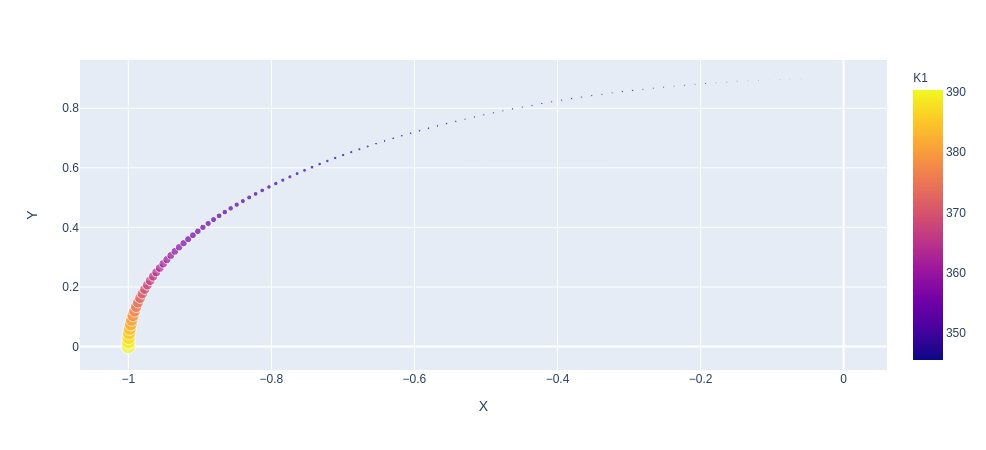

In [416]:
px.scatter(cracks, 'X', 'Y', color='K1', size='K1_normed', size_max=10)

In [426]:
# Replace with actual x, y values for FAD
x = np.linspace(cracks['X'].min(), cracks['X'].max(), 100)
fad = -2.4 + -3 * x

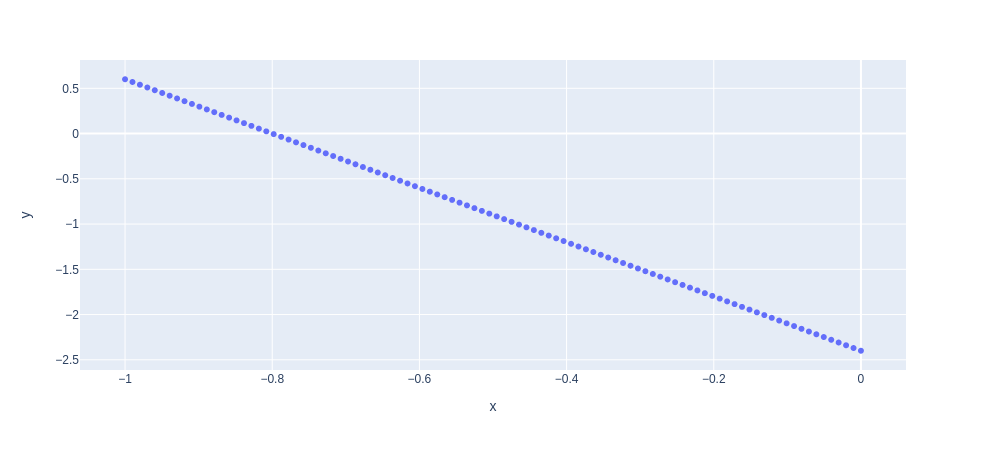

In [427]:
px.scatter(x=x, y=fad)

In [428]:
model_linear = interpolate.interp1d(x, fad)

In [432]:
cracks['model_Y'] = model_linear(cracks['X'])

In [433]:
cracks['State'] = cracks['Y'] > cracks["model_Y"]

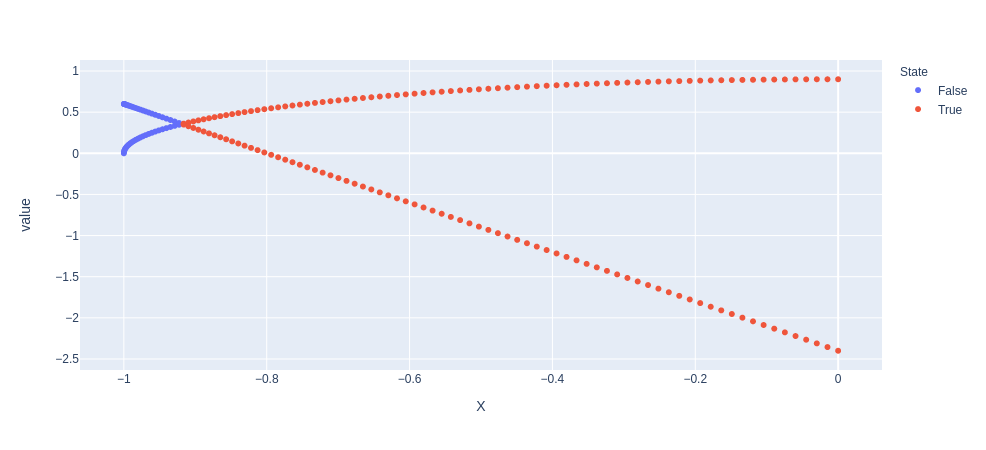

In [436]:
px.scatter(cracks, 'X', y=['Y', 'model_Y'], color='State')

https://bit.ly/pythoncharmers2021

Datasets:
https://github.com/PythonCharmers/PythonCharmersData

Documentation:
https://github.com/PythonCharmers/PythonCharmersDocs


help@pythoncharmers.com

https://github.com/vinta/awesome-python

In [437]:
!conda install kikuchipy --channel conda-forge

Solving environment: \ ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



In [ ]:
# Exchange inline for notebook or qt5 (from pyqt) for interactive plotting
%matplotlib inline

import hyperspy.api as hs
import matplotlib.pyplot as plt
import numpy as np
import kikuchipy as kp


# Use kp.load("data.h5") to load your own data
s = kp.data.nickel_ebsd_large(allow_download=True)  # External download
s